In [1]:
!pip install keras-tuner -q

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [4]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [8]:
x_train[0].shape

(28, 28, 1)

In [9]:
from tensorflow.keras import layers

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters=hp.Int("conv1filter", min_value=30, max_value=200, step=10),
            kernel_size=hp.Choice("conv1kernel",values=[3,4,]),
            activation ='relu',
            input_shape=(28,28,1)
        ),
        keras.layers.Conv2D(
            filters=hp.Int("conv2filter", min_value=30, max_value=200, step=10),
            kernel_size=hp.Choice("conv2kernel",values=[3,4]),
            activation='relu'
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int("units", min_value=32, max_value=100, step=10),
            activation="relu"
        ),
        keras.layers.Dense(
            units=10,
            activation="softmax"
        )
     ])
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
         optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
         loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
         metrics=["accuracy"],
    )
    return model

In [10]:
import keras_tuner
from keras_tuner import RandomSearch
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=4,
    directory="ma",
    project_name="Fashion_mnist",
)

INFO:tensorflow:Reloading Oracle from existing project ma/Fashion_mnist/oracle.json
INFO:tensorflow:Reloading Tuner from ma/Fashion_mnist/tuner0.json


In [11]:
tuner.search(x_train, y_train, epochs=4, validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [12]:
models = tuner.get_best_models(num_models=2)
model = models[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 120)       1200      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 40)        43240     
                                                                 
 flatten (Flatten)           (None, 23040)             0         
                                                                 
 dense (Dense)               (None, 62)                1428542   
                                                                 
 dense_1 (Dense)             (None, 10)                630       
                                                                 
Total params: 1,473,612
Trainable params: 1,473,612
Non-trainable params: 0
_________________________________________________________________


In [13]:
model=model.fit(x_train,y_train,epochs=9,validation_split=0.2)

Epoch 1/9


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 13s 7ms/step - loss: 0.1515 - accuracy: 0.9446 - val_loss: 0.2529 - val_accuracy: 0.9126
Epoch 2/9
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1208 - accuracy: 0.9560 - val_loss: 0.2656 - val_accuracy: 0.9103
Epoch 3/9
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0937 - accuracy: 0.9659 - val_loss: 0.2755 - val_accuracy: 0.9128
Epoch 4/9
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0684 - accuracy: 0.9765 - val_loss: 0.3021 - val_accuracy: 0.9128
Epoch 5/9
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0499 - accuracy: 0.9825 - val_loss: 0.3553 - val_accuracy: 0.9085
Epoch 6/9
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0383 - accuracy: 0.9868 - val_loss: 0.3591 - val_accuracy: 0.9151
Epoch 7/9
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0302 - accuracy: 0.9897 - val_loss: 0.3823 - val_accuracy: 0.9148
Epoch 8/

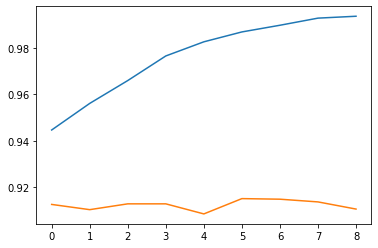

In [17]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])